In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import requests
import json
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from fractions import Fraction
%matplotlib inline

In [2]:
def get_time_series_data(countries, cumsum=True):
    # Get data for all the countries
    data_dict = {}
    datafram_dict = {}
    for country in countries:
        data = json.loads(requests.get(f'https://corona.lmao.ninja/historical/{country}').content)
        data_dict[country] = data['timeline']
    datafram_dict['cases'] = pd.DataFrame()
    datafram_dict['recovered'] = pd.DataFrame()
    datafram_dict['deaths'] = pd.DataFrame()
    
    dates = list(data_dict[countries[0]]['cases'].keys())
    
    
    for data_type, df in datafram_dict.items():
        df['dates'] = dates
        for country in countries:
            df[country] = list(data_dict[country][data_type].values()) if cumsum else inverse_cumsum(data_dict[country][data_type].values())

    return datafram_dict['cases'], datafram_dict['recovered'], datafram_dict['deaths']

def inverse_cumsum(cumsum_list):
    array = np.array(list(cumsum_list))
    array[1:] -= array[:-1].copy()
    return array

In [19]:
countries = ['india','italy']
cases, recovered, deaths = get_time_series_data(countries, True)

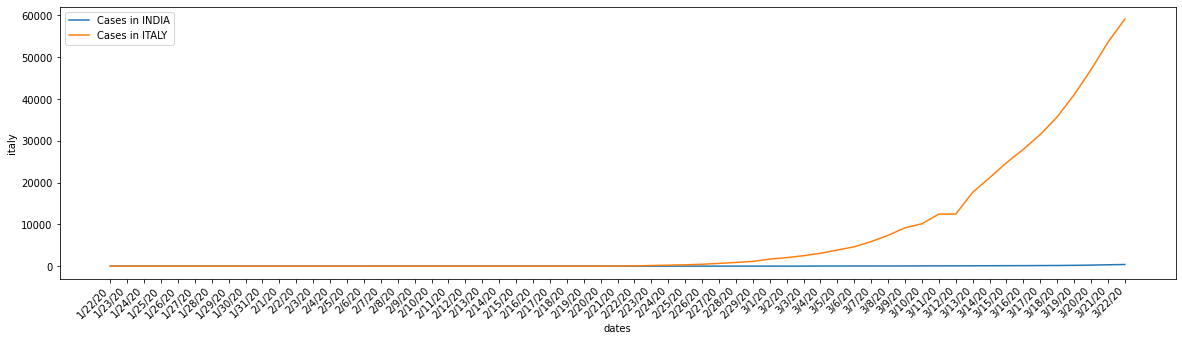

In [20]:
plt.figure(figsize=(20,5))
df = cases
for country in countries:
    dates = df.dates
    chart = sns.lineplot(x=df.dates, y=df[country], legend='brief', label=f'Cases in {country.upper()}', sort=False)
    var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

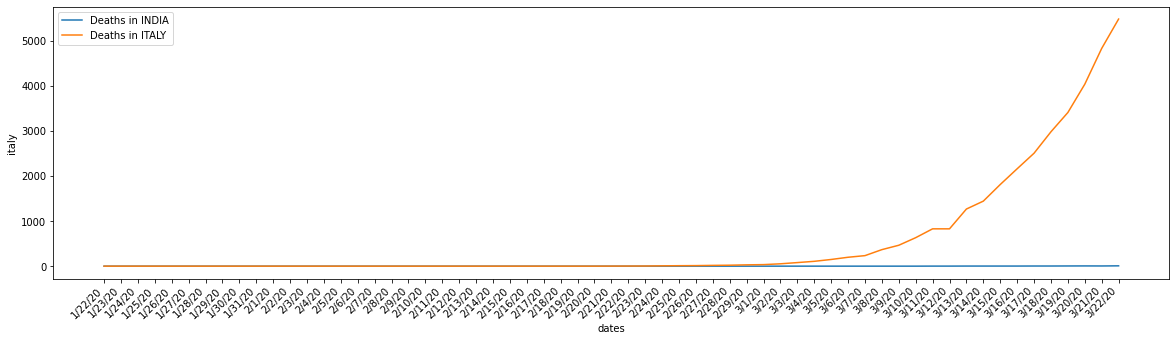

In [21]:
plt.figure(figsize=(20,5))
df = deaths
for country in countries:
    dates = df.dates
    chart = sns.lineplot(x=df.dates, y=df[country], legend='brief', label=f'Deaths in {country.upper()}', sort=False)
    var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

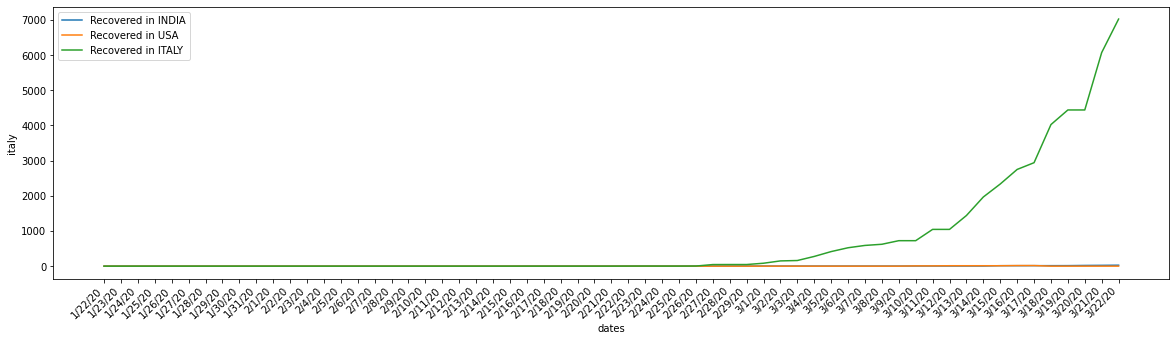

In [73]:
plt.figure(figsize=(20,5))
df = recovered
for country in countries:
    dates = df.dates
    chart = sns.lineplot(x=df.dates, y=df[country], legend='brief', label=f'Recovered in {country.upper()}', sort=False)
    var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

In [41]:
total_cases = pd.DataFrame()
total_cases['dates'] = cases.dates

In [77]:
for country in countries:
    total_cases[country] = cases[country].values - (deaths[country].values + recovered[country].values)

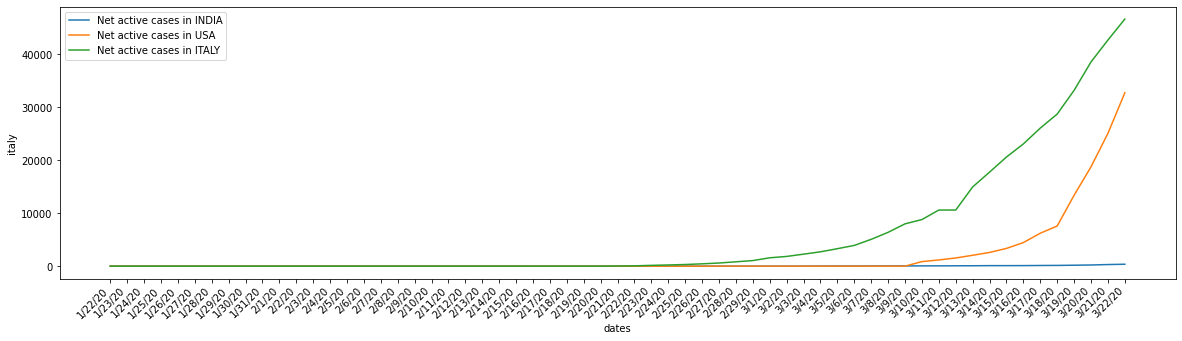

In [78]:
plt.figure(figsize=(20,5))
df = total_cases
for country in countries:
    dates = df.dates
    chart = sns.lineplot(x=df.dates, y=df[country], legend='brief', label=f'Net active cases in {country.upper()}', sort=False)
    var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

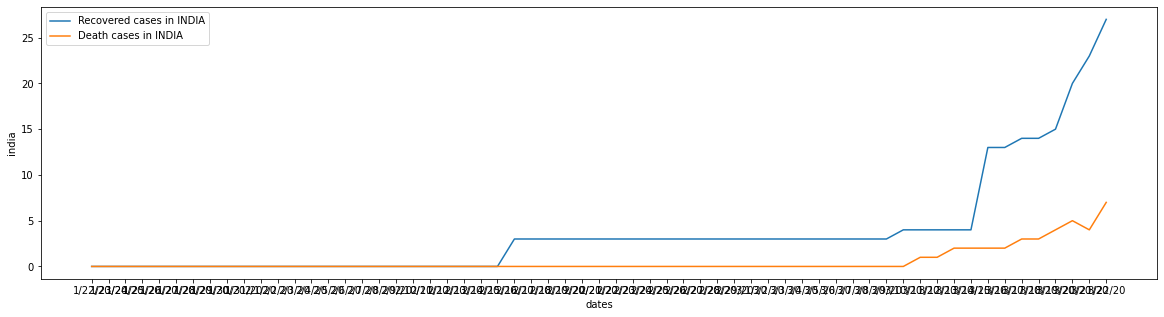

In [79]:
plt.figure(figsize=(20,5))
country='india'
dates = deaths.dates
chart = sns.lineplot(x=dates, y=recovered[country], legend='brief', label=f'Recovered cases in {country.upper()}', sort=False)
chart = sns.lineplot(x=dates, y=deaths[country], legend='brief', label=f'Death cases in {country.upper()}', sort=False)

## Get data with cumsum=False

In [4]:
cases_day, recovered_day, deaths_day = get_time_series_data(countries,cumsum=False)

## Calculate moving average of confirmed cases

In [140]:
# Required data with cumsum=False
def moving_average_df(countries, cases, recovered, death):
    cases[countries] = cases[countries].rolling(2).mean()
    recovered[countries] = recovered[countries].rolling(2).mean()
    death[countries] = death[countries].rolling(2).mean()
    return cases, recovered, death

In [141]:
cases_avg, recovered_avg, deaths_avg = moving_average_df(countries, cases_day, recovered_day, deaths_day)

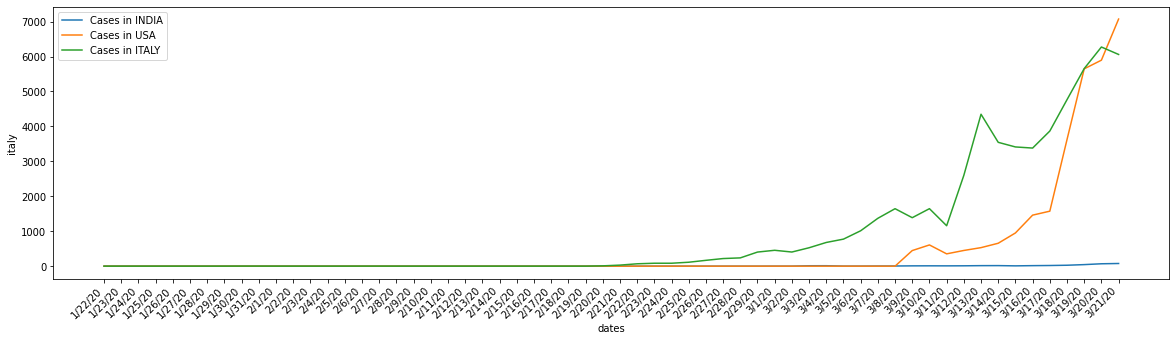

In [142]:

plt.figure(figsize=(20,5))
df = cases_avg
for country in countries:
#     dates = df.dates
    chart = sns.lineplot(x=dates, y=df[country], legend='brief', label=f'Cases in {country.upper()}', sort=False)
    var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

In [67]:
cases

,dates,india,italy
0,1/22/20,0,0
1,1/23/20,0,0
2,1/24/20,0,0
3,1/25/20,0,0
4,1/26/20,0,0
5,1/27/20,0,0
6,1/28/20,0,0
7,1/29/20,0,0
8,1/30/20,1,0
9,1/31/20,1,2


In [ ]:
# DRC Ratio ==> Death: Recovered: Confirmed
# Requires Moving average DF
# def calculate_drc_ratio(countries, cases, recovered, death):
#     d_r_c = pd.DataFrame()
#     d_r = 
#     r_c = 
#     d_r_c
#     for country in countries:
        


In [48]:
# Python 3 implementation  
# of above approach 
import math 
  
# Function to print a:b:c 
def solveProportion(a, b1, b2, c): 
  
    A = a * b2 
    B = b1 * b2 
    C = b1 * c 
  
    # To print the given proportion 
    # in simplest form. 
    gcd1 = math.gcd(math.gcd(A, B), C) 
  
    return str(A // gcd1) + ":" +\
           str(B // gcd1) + ":" +\
           str(C // gcd1)
  

In [127]:
(0.28571429).as_integer_ratio()

(5146971079913703, 18014398509481984)

In [24]:
recovered_day['india'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 1, 0, 1, 5, 3, 4])

## D:C

In [58]:
dc_df = pd.DataFrame()
dc_df['dates'] = dates

# D:C

for country in countries:
    d_c = []
    for d, c in zip(deaths_day[country].values,recovered_day[country].values):
        try:
            d_c.append(str(Fraction(f'{d}/{c}')))
        except ZeroDivisionError as ex:
            d_c.append('0')
        except ValueError as ex:
            d_c.append('0')
    dc_df[country] = d_c

## R:C

In [59]:
rc_df = pd.DataFrame()
rc_df['dates'] = dates

# R:C

for country in countries:
    r_c = []
    for r, c in zip(recovered_day[country].values,cases_day[country].values):
        try:
            r_c.append(str(Fraction(f'{r}/{c}')))
        except ZeroDivisionError as ex:
            r_c.append('0')
        except ValueError as ex:
            r_c.append('0')
    rc_df[country] = r_c

## R:D

In [60]:
rd_df = pd.DataFrame()
rd_df['dates'] = dates

# R:D

for country in countries:
    r_d = []
    for r, d in zip(recovered_day[country].values,deaths_day[country].values):
        try:
            r_d.append(str(Fraction(f'{r}/{d}')))
        except ZeroDivisionError as ex:
            r_d.append('0')
        except ValueError as ex:
            r_d.append('0')
    rd_df[country] = r_d

In [61]:
rd_df

,dates,india,italy
0,1/22/20,0,0
1,1/23/20,0,0
2,1/24/20,0,0
3,1/25/20,0,0
4,1/26/20,0,0
5,1/27/20,0,0
6,1/28/20,0,0
7,1/29/20,0,0
8,1/30/20,0,0
9,1/31/20,0,0


In [52]:
dc_df

,dates,india,italy
0,1/22/20,0,0
1,1/23/20,0,0
2,1/24/20,0,0
3,1/25/20,0,0
4,1/26/20,0,0
5,1/27/20,0,0
6,1/28/20,0,0
7,1/29/20,0,0
8,1/30/20,0,0
9,1/31/20,0,0


In [68]:
#R:D = 4/3
#D:C = 3/4

solveProportion(136,93,93,136)
# 22 March 2020

'136:93:136'

#### Case 1

In [ ]:
### Grouped countrywise not day level
# Total cases
# Total deaths
# Total recovered


#### Ratios
# death: cases
# recovered: cases

### Case 2

In [ ]:
#### Datewise cumulative 
# Total cases
# Total deaths
# Total recovered

In [ ]:
### Moving averages with deviation

### Case 3

In [ ]:
# Timelapse of Covid 19
# Prediction for future dates (country wise)